### <font color='green'>Import all Requirements</font>

In [144]:
from requirements import *
from PreProcessing import *
%matplotlib inline
warnings.simplefilter("ignore")

### <font color='green'>Read Dataset</font>

In [145]:
df_train = pd.read_csv('train.csv')

### <font color='green'>Initial Visualization of Data</font>

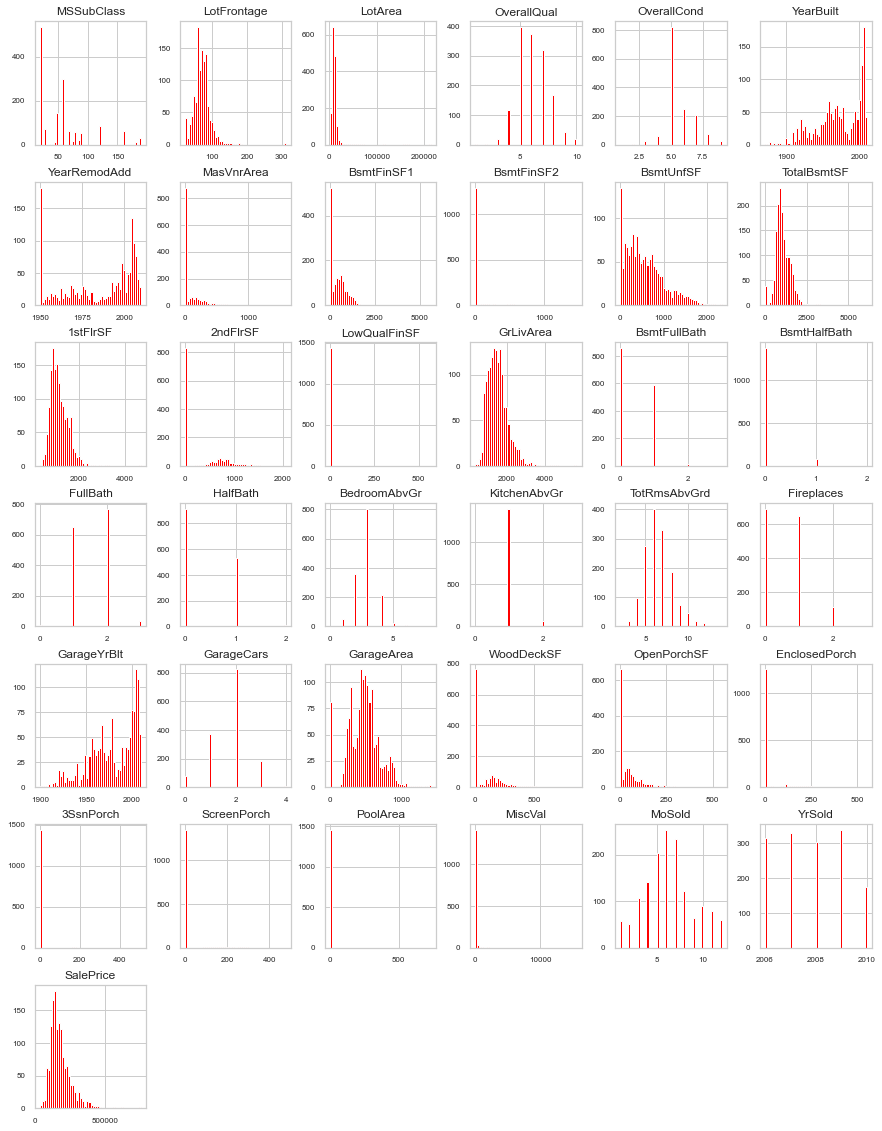

In [146]:
fig_ = df_train.drop(columns=['Id']).hist(figsize=(15, 20), bins=50, color="red", xlabelsize=8, ylabelsize=8)

### <font color='green'>Missing Data Values Visualization</font>

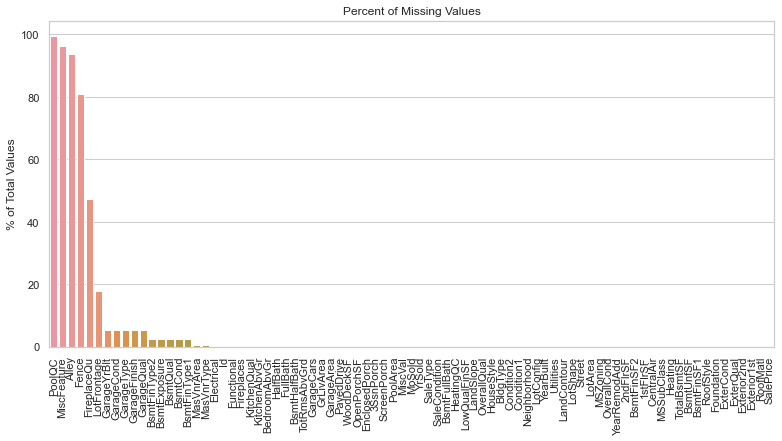

,Missing Values,% of Total Values,Type
PoolQC,1453,99.5,str
MiscFeature,1406,96.3,str
Alley,1369,93.8,str
Fence,1179,80.8,str
FireplaceQu,690,47.3,str
...,...,...,...
ExterQual,0,0.0,str
Exterior2nd,0,0.0,str
Exterior1st,0,0.0,str
RoofMatl,0,0.0,str


In [147]:
df_class = PreProcess(df_train)
df_class.visualize_missing_values()

### <font color='green'>Drop Id column from Dataset</font>

In [148]:
df_train.drop(columns=["Id"], inplace=True)

### <font color='green'>Visualize Correlations > 50%</font>

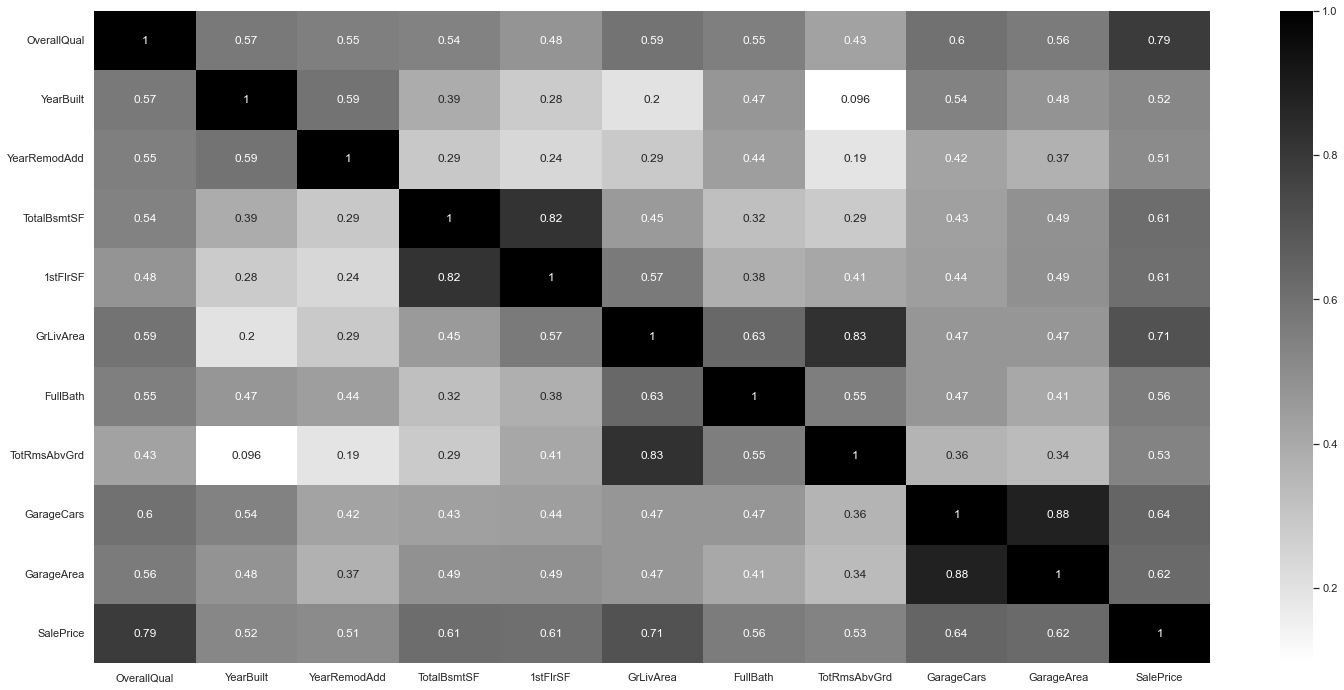

In [149]:
df_corrs = df_train.corr()
good_corrs = df_corrs.index[abs(df_corrs["SalePrice"]) > 0.5]
plt.figure(figsize = (25, 12))
sns.heatmap(df_train[good_corrs].corr(), annot = True, cmap = "binary");

### <font color='green'>Alternate View of Dataset (Correlations > 50%)</font>

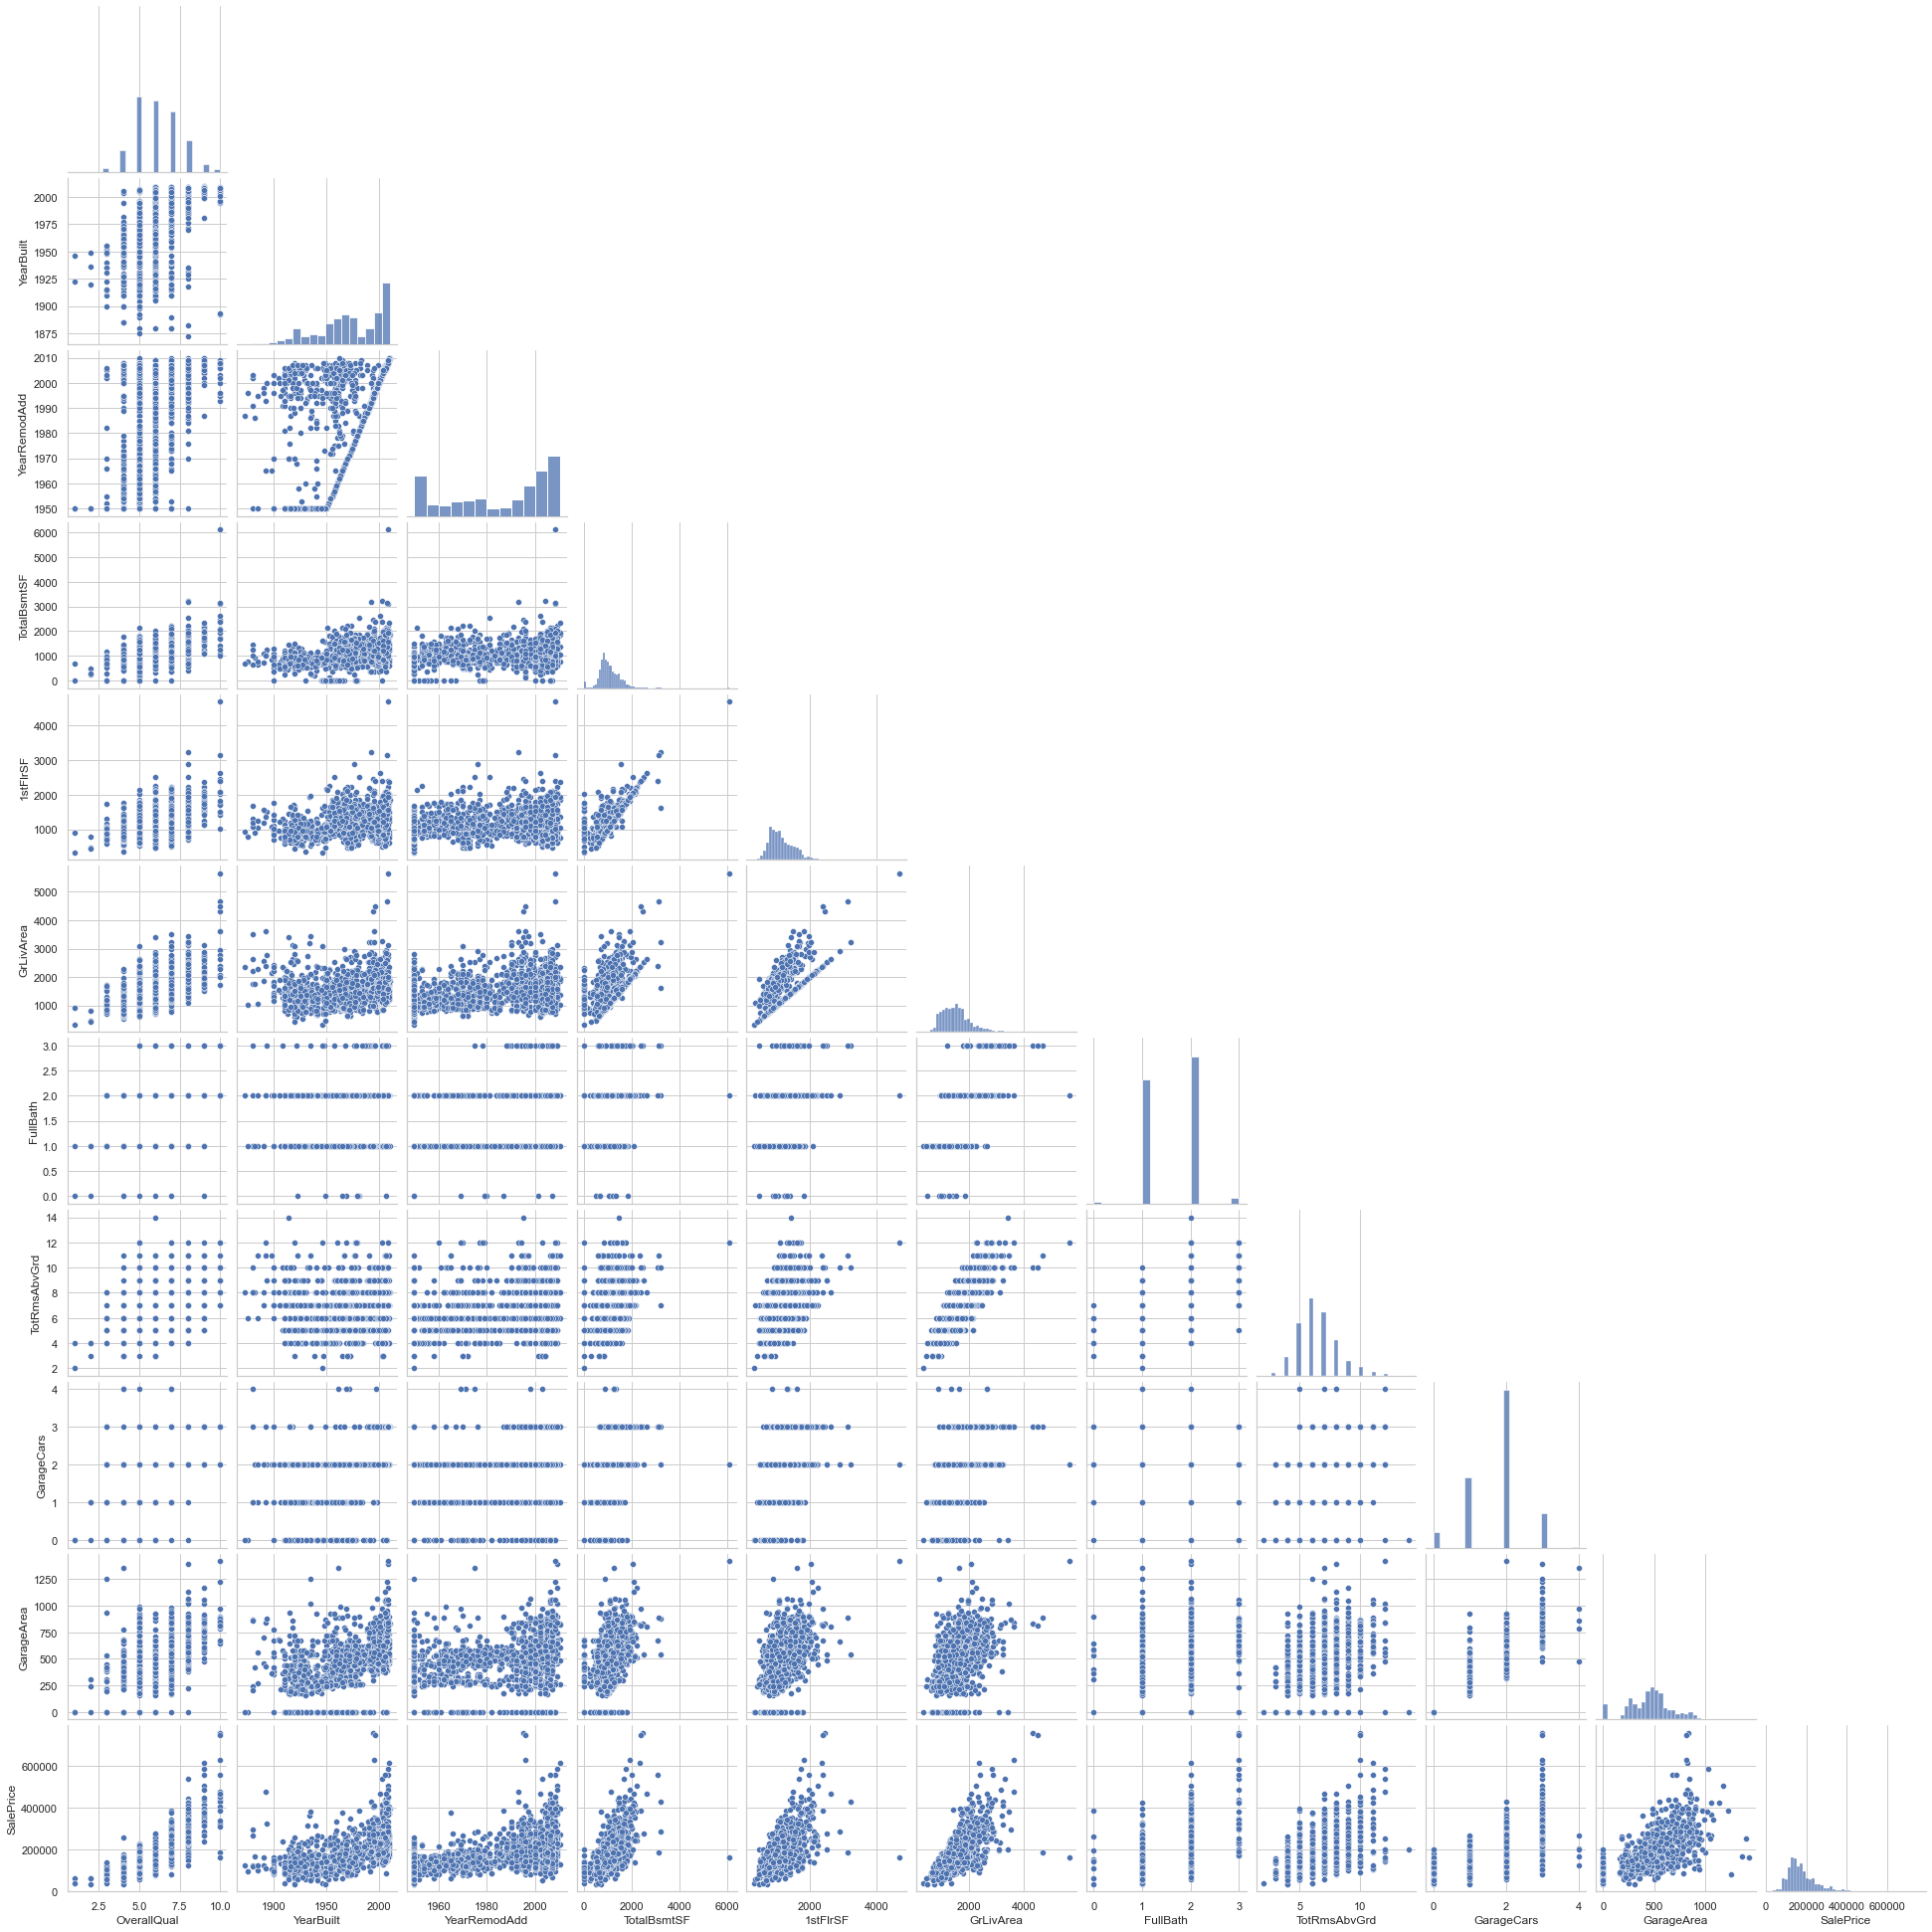

In [150]:
sns.pairplot(df_train[good_corrs], corner = True);

### <font color='green'>Drop Columns with low correlation, or correlations greater than 90%</font>

In [151]:
df = df_train[good_corrs]

### <font color='green'>Check for Nulls in Dataset (Summation of Total Null Values)</font>

In [152]:
df.isnull().sum().sum()

0

### <font color='green'>No PreProcessing needed, continue to Training/Testing</font>

In [153]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=.4, random_state=10)

In [154]:
regression = GradientBoostingRegressor(random_state=42, loss='ls', learning_rate=0.1)
regression.fit(X_train, y_train)

GradientBoostingRegressor(loss='ls', random_state=42)

### <font color='green'>Prediction Scores</font>
##### Gradient Boosting regression analysis

In [155]:
y_pred = regression.predict(X_test)
score = round(regression.score(X_train, y_train) * 100,3)
print(f"Gradient Boosting Score: {score}%")

Gradient Boosting Score: 94.583%


### <font color='green'>Feature Importance</font>

In [156]:
feature_importance = regression.feature_importances_
feature_importance = (feature_importance / feature_importance.max()) * 100
feature_importance

array([100.        ,   3.50293945,   6.68072472,  12.95596691,
         6.75589198,  31.28397477,   3.05511669,   0.44588098,
         6.46534436,   3.77527222])

Text(0.5, 1.0, 'Gradient Boosting: Importance of Feature')

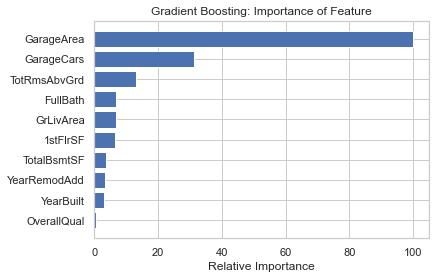

In [157]:


sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0])
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.iloc[:, :-1].columns)
plt.xlabel("Relative Importance")
plt.title("Gradient Boosting: Importance of Feature")